#### Project 4

In [44]:
# uv export --no-hashes > requirements.txt
print("notebook ok")

notebook ok


In [124]:
from research_and_analyst.utils.model_loader import ModelLoader

In [125]:
model_loader = ModelLoader()

{"timestamp": "2025-10-20T13:29:24.496928Z", "level": "info", "event": "GOOGLE_API_KEY loaded from environment"}
{"timestamp": "2025-10-20T13:29:24.504696Z", "level": "info", "event": "GROQ_API_KEY loaded from environment"}
{"timestamp": "2025-10-20T13:29:24.510777Z", "level": "warning", "event": "ASTRA_DB_API_ENDPOINT is missing from environment"}
{"timestamp": "2025-10-20T13:29:24.515979Z", "level": "warning", "event": "ASTRA_DB_APPLICATION_TOKEN is missing from environment"}
{"timestamp": "2025-10-20T13:29:24.523690Z", "level": "warning", "event": "ASTRA_DB_KEYSPACE is missing from environment"}
{"config_keys": ["astra_db", "embedding_model", "retriever", "llm"], "timestamp": "2025-10-20T13:29:24.543546Z", "level": "info", "event": "YAML config loaded"}


In [126]:
llm = model_loader.load_llm()

{"provider": "groq", "model": "llama-3.1-8b-instant", "timestamp": "2025-10-20T13:29:32.173363Z", "level": "info", "event": "Loading LLM"}


In [8]:
llm.invoke("Hello")

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


AIMessage(content='Hello. How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 36, 'total_tokens': 46, 'completion_time': 0.020858029, 'prompt_time': 0.001726086, 'queue_time': 0.09128801, 'total_time': 0.022584115}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_34d416ee39', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--a31693aa-3db5-49db-9900-f08503485dfb-0', usage_metadata={'input_tokens': 36, 'output_tokens': 10, 'total_tokens': 46})

In [11]:
from typing import List
from typing_extensions import TypedDict
from pydantic import BaseModel, Field

In [97]:
def human_feedback(state):
    """_summary_

    Args:
        state (_type_): _description_
    """
    pass

In [7]:
def create_analyst(state):
    """_summary_

    Args:
        state (_type_): _description_
    """
    pass

In [8]:
def should_continue(state):
    """_summary_

    Args:
        state (_type_): _description_
    """
    pass

In [9]:
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from langgraph.checkpoint.memory import MemorySaver

In [12]:
import operator
from typing import  Annotated
from langgraph.graph import MessagesState
class Analyst(BaseModel):
    """_summary_
    """
    name: str = Field(..., description="Name of the analyst")
    role: str = Field(..., description="Role of the analyst in the context of the topic")
    affiliation: str = Field(..., description="Primary affiliation of the analyst")
    description: str = Field(..., description="Description of the analyst focus, concerns, and motives")

    @property
    def persona(self) -> str:
        return f"Name: {self.name}\nRole: {self.role}\nAffiliation: {self.affiliation}\nDescription: {self.description}\n"

In [13]:
class Perspective(BaseModel):
    analysts: List[Analyst] = Field(..., description="Comprehensive list of analysts with their roles and affiliations.")

In [14]:
analyst = Analyst(
    name="klangat",
    role="Gen AI eng.",
    affiliation="OpenAI",
    description="Focus on building and deploying generative AI models."
)

In [13]:
analyst

Analyst(name='klangat', role='Gen AI eng.', affiliation='OpenAI', description='Focus on building and deploying generative AI models.')

In [24]:
print(analyst.persona)

Name: klangat
Role: Gen AI eng.
Affiliation: OpenAI
Description: Focus on building and deploying generative AI models.



In [25]:
analyst.role

'Gen AI eng.'

In [26]:
analyst.affiliation

'OpenAI'

In [25]:
class GenerateAnalystsState(TypedDict):
    """_summary_
    """
    topic: str
    max_analysts: int
    human_analyst_feedback: str
    analysts: List[Analyst]

In [26]:
GenerateAnalystsState(
    topic="AI in healthcare",
    max_analysts=5,
    human_analyst_feedback="give the real information",
)

{'topic': 'AI in healthcare',
 'max_analysts': 5,
 'human_analyst_feedback': 'give the real information'}

In [27]:
analyst_instructions = """You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:

1. First, review the research topic:
{topic}
        
2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: 
        
{human_analyst_feedback}
    
3. Determine the most interesting themes based upon documents and / or feedback above.
                    
4. Pick the top {max_analysts} themes.

5. Assign one analyst to each theme."""

In [28]:
def create_analyst(state):
    """It is creating my analyst
    """
    topic = state["topic"]
    max_analysts = state["max_analysts"]
    human_analyst_feedback = state.get("human_analyst_feedback", "")

    structured_llm = llm.with_structured_output(Perspective)

    system_messages = analyst_instructions.format(
        topic=topic,
        max_analysts=max_analysts,
        human_analyst_feedback=human_analyst_feedback
    )

    analysts = structured_llm.invoke([SystemMessage(content=system_messages)] + [HumanMessage(content="Generate the set of analysts")])

    # write the list of analysis to state
    return{"analysts": analysts.analysts}

In [29]:
print([analyst_instructions.format(
    topic="AI in healthcare",
    max_analysts=4,
    human_analyst_feedback="please expalain only on AI"
)] + ["Generate the set of analysts."])

['You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:\n\n1. First, review the research topic:\nAI in healthcare\n\n2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: \n\nplease expalain only on AI\n\n3. Determine the most interesting themes based upon documents and / or feedback above.\n\n4. Pick the top 4 themes.\n\n5. Assign one analyst to each theme.', 'Generate the set of analysts.']


In [30]:
create_analyst(
    {'topic': 'AI in healthcare',
    'max_analysts': 4,
    'human_analyst_feedback': 'give the real information'}
)

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


{'analysts': [Analyst(name='Dr. Rachel Kim', role='Healthcare Expert', affiliation='Johns Hopkins University', description='Focus on AI applications in medical diagnosis and treatment, with concerns about data privacy and algorithmic bias.'),
  Analyst(name='Dr. Liam Chen', role='AI Researcher', affiliation='MIT', description='Examines the potential of AI in personalized medicine, with a focus on machine learning and natural language processing.'),
  Analyst(name='Dr. Ava Moreno', role='Ethics Specialist', affiliation='Harvard University', description='Investigates the ethical implications of AI in healthcare, including issues of patient autonomy and informed consent.'),
  Analyst(name='Dr. Julian Lee', role='Industry Consultant', affiliation='Deloitte', description='Analyzes the business and economic impact of AI on the healthcare industry, with a focus on cost savings and efficiency gains.')]}

In [31]:
def human_feedback(state):
    """ No op node that should be interrupted on """
    pass

In [32]:
def should_continue(state):
    """ summanry"""
    feedback = (state.get("human_analyst_feedback") or "").strip().lower()
    if feedback and feedback not in ["", "none", "no", "nope", "skip", "done", "continue"]:
        return "create_analyst"
    return END

In [33]:
from IPython.display import display, Markdown, Image

In [34]:
builder = StateGraph(GenerateAnalystsState)

In [35]:
builder.add_node("create_analyst", create_analyst)
builder.add_node("human_feedback", human_feedback)

In [36]:
builder.add_edge(START, "create_analyst")
builder.add_edge("create_analyst", "human_feedback")
builder.add_conditional_edges("human_feedback",
                               should_continue,
                               ["create_analyst",
                                END])

In [37]:
memory = MemorySaver()

In [38]:
graph = builder.compile(interrupt_before= ["human_feedback"], checkpointer=memory)

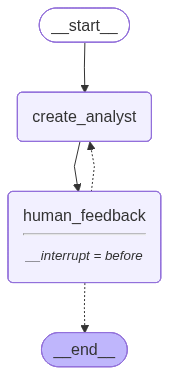

In [39]:
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [41]:
topic = "The benefits of adopting Langgraph as an agent Framework"

In [42]:
max_analysts = 4
thread = {"configurable": {"thread_id": 1}}

In [43]:
for event in graph.stream({"topic":topic,
            "max_analysts":max_analysts},
            thread,
            stream_mode= "values"):
    analysts = event.get('analysts', '')

    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Role: {analyst.role}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Description: {analyst.description}")
            print("-" * 50)

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


Name: Dr. Rachel Kim
Role: AI Researcher
Affiliation: Stanford University
Description: Expert in natural language processing and agent frameworks, focusing on the benefits of Langgraph for improved language understanding
--------------------------------------------------
Name: Dr. Liam Chen
Role: Software Engineer
Affiliation: Microsoft
Description: Specialist in developing AI-powered applications, examining the potential of Langgraph for enhancing agent capabilities
--------------------------------------------------
Name: Dr. Ava Morales
Role: Cognitive Scientist
Affiliation: MIT
Description: Researcher in human-computer interaction, investigating the impact of Langgraph on user experience and interface design
--------------------------------------------------
Name: Dr. Julian Lee
Role: Tech Consultant
Affiliation: Deloitte
Description: Advisor on AI adoption and implementation, analyzing the feasibility and scalability of Langgraph for enterprise solutions
---------------------------

In [76]:
state = graph.get_state(thread)

In [77]:
state

StateSnapshot(values={'topic': 'The benefits of adopting Langgraph as an agent Framework', 'max_analysts': 4, 'analysts': [Analyst(name='Dr. Rachel Kim', role='AI Researcher', affiliation='Stanford University', description='Focuses on the benefits of Langgraph in natural language processing and its potential to improve human-computer interaction'), Analyst(name='Dr. Liam Chen', role='Software Engineer', affiliation='Microsoft', description='Examines the advantages of adopting Langgraph as an agent framework for building scalable and efficient AI systems'), Analyst(name='Dr. Ava Moreno', role='Cognitive Scientist', affiliation='MIT', description='Investigates the cognitive benefits of using Langgraph in AI development, including improved decision-making and problem-solving capabilities'), Analyst(name='Dr. Ethan Patel', role='AI Ethicist', affiliation='Harvard University', description='Explores the ethical implications of adopting Langgraph as an agent framework, including issues relate

In [78]:
# Check attribute- next
state.next

('human_feedback',)

In [79]:
graph.update_state(thread,
                   {"human_analyst_feedback": "add some start up perspective and focus on latest enterprise application."}, as_node="human_feedback"
                   )

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0acd28-24e8-6e8b-8002-62d243119eb8'}}

In [98]:
# If we are satisfied, then we simply supply no feedback
further_feedback = ""

In [99]:
# 1) Get the latest state (you're paused at 'human_feedback')
state = graph.get_state(thread)

# 2) Use the exact config from that state (it already has thread_id, checkpoint_ns, checkpoint_id)
cfg = state.config

In [100]:
# 3) Update feedback at the 'human_feedback' node
#    Tip: if your TypedDict says `human_analyst_feedback: str`, prefer "" (empty string) over None
graph.update_state(cfg, {"human_analyst_feedback": ""}, as_node="human_feedback")

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0ad805-e57d-6722-8002-42bf1d33ea8b'}}

In [101]:
# 4) Verify it moved to END
final_state = graph.get_state(thread)
print(final_state.next) # should be (END,)

()


In [84]:
analysts = final_state.values.get("analysts")
analysts

[Analyst(name='Dr. Rachel Kim', role='AI Researcher', affiliation='Stanford University', description='Focuses on the benefits of Langgraph in natural language processing and its potential to improve human-computer interaction'),
 Analyst(name='Dr. Liam Chen', role='Software Engineer', affiliation='Microsoft', description='Examines the advantages of adopting Langgraph as an agent framework for building scalable and efficient AI systems'),
 Analyst(name='Dr. Ava Moreno', role='Cognitive Scientist', affiliation='MIT', description='Investigates the cognitive benefits of using Langgraph in AI development, including improved decision-making and problem-solving capabilities'),
 Analyst(name='Dr. Ethan Patel', role='AI Ethicist', affiliation='Harvard University', description='Explores the ethical implications of adopting Langgraph as an agent framework, including issues related to bias, transparency, and accountability')]

In [85]:
for analyst in analysts:
    print(f"Name: {analyst.name}")
    print(f"Role: {analyst.role}")
    print(f"Affiliation: {analyst.affiliation}")
    print(f"Description: {analyst.description}")
    print("-" * 50)

Name: Dr. Rachel Kim
Role: AI Researcher
Affiliation: Stanford University
Description: Focuses on the benefits of Langgraph in natural language processing and its potential to improve human-computer interaction
--------------------------------------------------
Name: Dr. Liam Chen
Role: Software Engineer
Affiliation: Microsoft
Description: Examines the advantages of adopting Langgraph as an agent framework for building scalable and efficient AI systems
--------------------------------------------------
Name: Dr. Ava Moreno
Role: Cognitive Scientist
Affiliation: MIT
Description: Investigates the cognitive benefits of using Langgraph in AI development, including improved decision-making and problem-solving capabilities
--------------------------------------------------
Name: Dr. Ethan Patel
Role: AI Ethicist
Affiliation: Harvard University
Description: Explores the ethical implications of adopting Langgraph as an agent framework, including issues related to bias, transparency, and accoun

In [86]:
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from langgraph.checkpoint.memory import MemorySaver

In [120]:
from langchain_community.document_loaders import WikipediaLoader

# docs = WikipediaLoader(query="LangGraph").load()
# print(docs[0].page_content[:500])

In [89]:
# docs = WikipediaLoader(query="The benefits of adopting AWS cloud").load()
# print(docs[0].page_content[:500])

In [121]:
from langchain_community.utilities import WikipediaAPIWrapper
# wiki = WikipediaAPIWrapper(doc_content_chars_max=4000)
# docs = wiki.run("The benefits of adopting LangGraph as an agentic framework")
# print(docs)

In [91]:
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from langgraph.checkpoint.memory import MemorySaver

In [122]:
from langchain_community.utilities import WikipediaAPIWrapper

#### Second Workflow

In [116]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [117]:
from dotenv import load_dotenv
load_dotenv()  # take environment variables from .env.
import os
tavily_api_key = os.getenv("TAVILY_API_KEY")

In [118]:
tavily_search = TavilySearchResults(tavily_api_key=tavily_api_key)
tavily_search.invoke("langgraph")

C:\Users\user\AppData\Local\Temp\ipykernel_17916\3682967505.py:1: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily_search = TavilySearchResults(tavily_api_key=tavily_api_key)


[{'title': 'Learn LangGraph basics - Overview',
  'url': 'https://langchain-ai.github.io/langgraph/concepts/why-langgraph/',
  'content': 'Trusted by companies shaping the future of agents— including Klarna, Replit, Elastic, and more— LangGraph is a low-level orchestration framework and runtime for building, managing, and deploying long-running, stateful agents.\nLangGraph is very low-level, and focused entirely on agent orchestration. Before using LangGraph, we recommend you familiarize yourself with some of the components used to build agents, starting with models and tools.',
  'score': 0.9310187},
 {'title': 'What is LangGraph?',
  'url': 'https://www.geeksforgeeks.org/machine-learning/what-is-langgraph/',
  'content': '# What is LangGraph?\n\nLast Updated : \n10 Oct, 2025\n\nSuggest changes\n\n1 Likes\n\nLangGraph is an open-source framework built by LangChain that streamlines the creation and management of AI agent workflows. At its core, LangGraph combines large language models 

In [104]:
from langchain_community.document_loaders import WikipediaLoader


In [96]:
# docs = WikipediaLoader(query="LangGraph").load()
# print(docs[0].page_content[:200])

In [46]:
from typing import Annotated, List
import operator
from typing_extensions import TypedDict
from pydantic import BaseModel, Field

In [47]:
import operator
from typing import  Annotated
from langgraph.graph import MessagesState
class InterviewState(MessagesState):
    """ 
    """
    max_num_turn: int
    context: Annotated[list, operator.add]
    analyst: Analyst
    interview: str
    sections: list

class SearchQuery(BaseModel):
    """_summary_
    """
    search_query: str = Field(None, description="Search query for retrieval.")

    

In [63]:
state = {"max_num_turns":2, "context":[], "analyst":analyst, "interview":"","section":""}

In [64]:
state

{'max_num_turns': 2,
 'context': [],
 'analyst': Analyst(name='Dr. Julian Lee', role='Tech Consultant', affiliation='Deloitte', description='Advisor on technology adoption and integration, motivated by the cost-benefit analysis and return on investment of adopting Langgraph over Autogen'),
 'interview': '',
 'section': ''}

In [88]:
question_instructions = """You are an analyst tasked with interviewing an expert to learn about a specific topic. 

Your goal is boil down to interesting and specific insights related to your topic.

1. Interesting: Insights that people will find surprising or non-obvious.
        
2. Specific: Insights that avoid generalities and include specific examples from the expert.

Here is your topic of focus and set of goals: {goals}
        
Begin by introducing yourself using a name that fits your persona, and then ask your question.

Continue to ask questions to drill down and refine your understanding of the topic.
        
When you are satisfied with your understanding, complete the interview with: "Thank you so much for your help!"

Remember to stay in character throughout your response, reflecting the persona and goals provided to you."""

In [108]:
print(analyst.persona)

Name: Dr. Ethan Patel
Role: AI Ethicist
Affiliation: Harvard University
Description: Explores the ethical implications of adopting Langgraph as an agent framework, including issues related to bias, transparency, and accountability



In [109]:
question_instructions.format(goals = analyst.persona)

'You are an analyst tasked with interviewing an expert to learn about a specific topic. \n\nYour goal is boil down to interesting and specific insights related to your topic.\n\n1. Interesting: Insights that people will find surprising or non-obvious.\n\n2. Specific: Insights that avoid generalities and include specific examples from the expert.\n\nHere is your topic of focus and set of goals: Name: Dr. Ethan Patel\nRole: AI Ethicist\nAffiliation: Harvard University\nDescription: Explores the ethical implications of adopting Langgraph as an agent framework, including issues related to bias, transparency, and accountability\n\n\nBegin by introducing yourself using a name that fits your persona, and then ask your question.\n\nContinue to ask questions to drill down and refine your understanding of the topic.\n\nWhen you are satisfied with your understanding, complete the interview with: "Thank you so much for your help!"\n\nRemember to stay in character throughout your response, reflecti

In [87]:
def generate_question(state:InterviewState):
    """Node to generate the questions"""
    # get state
    analyst = state["analyst"]
    messages = state["messages"]

    # generate the question
    system_message = question_instructions.format(goals = analyst.persona)
    question = llm.invoke([SystemMessage(content=system_message)] + messages)

    # return the question through state
    return {"messages": [question]}

In [65]:
interview_builder = StateGraph(InterviewState)

In [49]:
from langchain_core.messages import get_buffer_string

In [76]:
# Search query writing
search_instructions = SystemMessage(content=f"""You will be given a conversation between an analyst and an expert. 
Your goal is to generate a well-structured query for use in retrieval and / or web-search related to the conversation. 
First, analyze the full conversation.
Pay particular attention to the final question posed by the analyst.
Convert this final question into a well-structured web search query""")


In [77]:
def ask_question(state:InterviewState):
    """_summary_

    Args:
        state (InterviewState): _description_
    """
    pass

In [78]:
def search_web(state:InterviewState):
    """
    Retrieve data from the web.
    """
    structure_llm = llm.with_structured_output(SearchQuery)
    search_query = structure_llm.invoke([search_instructions]+["messages"])

    # Search
    search_docs = tavily_search.invoke(search_query.search_query)

    # Format
    formatted_search_docs = "\n\n---\n\n".join(
        {
            f'<Document href="{doc["url"]}"/>\n{doc["content"]}\n</Document>'
            for doc in search_docs
        }
    )

    return {"context": [formatted_search_docs]}

In [79]:
def search_wikipedia(state:InterviewState):
    """Retrieve data from wikipedia"""
    
    # Search query
    structured_llm = llm.with_structured_output(SearchQuery)
    search_query = structured_llm.invoke([search_instructions]+state["messages"])

    print("*" * 50)
    print(search_query)
    # Search
    search_docs = WikipediaLoader(query=search_query.search_query,
                                  load_max_docs=2).load()
    
    # Format
    formatted_search_docs = "\n\n---\n\n".join(
        {
            f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}"/>\n{doc.page_content}\n</Document>'
            for doc in search_docs
        }
    )

    return {"context": [formatted_search_docs]}

In [80]:
answer_instructions = """You are an expert being interviewed by an analyst.

Here is analyst area of focus: {goals}. 
        
You goal is to answer a question posed by the interviewer.

To answer question, use this context:
        
{context}

When answering questions, follow these guidelines:
        
1. Use only the information provided in the context. 
        
2. Do not introduce external information or make assumptions beyond what is explicitly stated in the context.

3. The context contain sources at the topic of each individual document.

4. Include these sources your answer next to any relevant statements. For example, for source # 1 use [1]. 

5. List your sources in order at the bottom of your answer. [1] Source 1, [2] Source 2, etc
        
6. If the source is: <Document source="assistant/docs/llama3_1.pdf" page="7"/>' then just list: 
        
[1] assistant/docs/llama3_1.pdf, page 7 
        
And skip the addition of the brackets as well as the Document source preamble in your citation."""

In [81]:
def generate_answer(state:InterviewState):
    """
    Node to answer a question
    """
    # Get state
    analyst = state["analyst"]
    messages = state["messages"]
    context = state["context"]

    # Answer question
    system_message = answer_instructions.format(goals = analyst.persona, context=context)
    answer = llm.invoke([SystemMessage(content=system_message)] + messages)

    # Name the message as coming from the expert
    answer.name = "expert"

    # Append it to the state
    return {"messages": [answer]}

In [82]:
def router_message(state:InterviewState, name: str = "expert"):
    """
    Router between question and answer.
    """
    # Get messages
    messages = state["messages"]
    max_num_turns = state.get("max_num_turns", 2)

    # Check the number of expert answers
    num_responses = len(
        [m for m in messages if isinstance(m, AIMessage) and m.name == name]
    )

    # end if expert has answered more than the max turns
    if num_responses >= max_num_turns:
        return "save_interview"
    
    # This router is run after each question - answer pair
    # Get the last question ased to check if it is the end of the discussion
    last_question = messages[-2]

    if "Thank you so much for your help" in last_question.content:
        return 'save_interview'
    
    return "ask_question"

In [83]:
def save_interview(state:InterviewState):
    """
    Save interview
    """
    # Get messages
    messages = state["messages"]

    # Cnvert interview to a string
    interview = get_buffer_string(messages)

    # Save to interviews key
    return {"interview": interview}

In [84]:
section_writer_instructions = """You are an expert technical writer. 
            
Your task is to create a short, easily digestible section of a report based on a set of source documents.

1. Analyze the content of the source documents: 
- The name of each source document is at the start of the document, with the <Document tag.
        
2. Create a report structure using markdown formatting:
- Use ## for the section title
- Use ### for sub-section headers
        
3. Write the report following this structure:
a. Title (## header)
b. Summary (### header)
c. Sources (### header)

4. Make your title engaging based upon the focus area of the analyst: 
{focus}

5. For the summary section:
- Set up summary with general background / context related to the focus area of the analyst
- Emphasize what is novel, interesting, or surprising about insights gathered from the interview
- Create a numbered list of source documents, as you use them
- Do not mention the names of interviewers or experts
- Aim for approximately 400 words maximum
- Use numbered sources in your report (e.g., [1], [2]) based on information from source documents
        
6. In the Sources section:
- Include all sources used in your report
- Provide full links to relevant websites or specific document paths
- Separate each source by a newline. Use two spaces at the end of each line to create a newline in Markdown.
- It will look like:

### Sources
[1] Link or Document name
[2] Link or Document name

7. Be sure to combine sources. For example this is not correct:

[3] https://ai.meta.com/blog/meta-llama-3-1/
[4] https://ai.meta.com/blog/meta-llama-3-1/

There should be no redundant sources. It should simply be:

[3] https://ai.meta.com/blog/meta-llama-3-1/
        
8. Final review:
- Ensure the report follows the required structure
- Include no preamble before the title of the report
- Check that all guidelines have been followed"""

In [85]:
def write_section(state:InterviewState):
    """
    Node to answer a question
    """
    # Get state
    interview = state["interview"]
    context = state["context"]
    analyst = state["analyst"]

    # Write section using either the gathered source docs from interview (context) or the interview itself (interview)
    system_message = section_writer_instructions.format(focus = analyst.description)
    section = llm.invoke([SystemMessage(content=system_message)] +
                          [HumanMessage(content=f"Use this source to write your section: {context}")])
    
    # Append it to state
    return {"sections": [section.content]}

In [89]:
interview_builder.add_node("ask_question", generate_question)
interview_builder.add_node("search_web", search_web)
interview_builder.add_node("search_wikipedia", search_wikipedia)
interview_builder.add_node("generate_answer", generate_answer)
interview_builder.add_node("save_interview", save_interview)
interview_builder.add_node("write_section", write_section)

In [90]:
interview_builder.add_edge(START, "ask_question")
interview_builder.add_edge("ask_question", "search_web")
interview_builder.add_edge("ask_question", "search_wikipedia")
interview_builder.add_edge("search_web", "generate_answer")
interview_builder.add_edge("search_wikipedia", "generate_answer")
interview_builder.add_conditional_edges("generate_answer",
                           router_message,
                           ["ask_question",
                            "save_interview"])
interview_builder.add_edge("save_interview", "write_section")
interview_builder.add_edge("write_section", END)

In [91]:
memory = MemorySaver()
interview_graph = interview_builder.compile(checkpointer=memory).with_config(run_name = "Conduct Interview")

In [92]:
from IPython.display import display, Markdown, Image

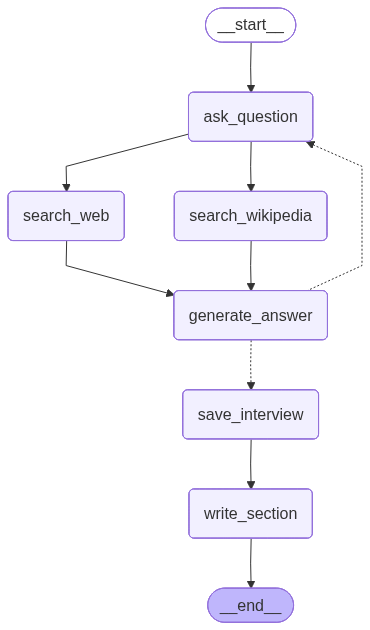

In [93]:
display(Image(interview_graph.get_graph().draw_mermaid_png()))

In [128]:
analyst

Analyst(name='Dr. Ethan Patel', role='AI Ethicist', affiliation='Harvard University', description='Explores the ethical implications of adopting Langgraph as an agent framework, including issues related to bias, transparency, and accountability')

In [129]:
messages = [HumanMessage("So you said you were writing an article on langgraph?")]

In [130]:
thread = {"configurable": {"thread_id": "1"}}

In [131]:
interview = interview_graph.invoke({"analyst": analyst, "messages": messages, "max_num_turn": 2}, thread)

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


**************************************************
search_query='Langgraph ethical concerns and solutions'


HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


**************************************************
search_query='addressing bias and ensuring transparency in Langgraph models'


HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


In [132]:
Markdown(interview['sections'][0])

## Exploring the Concept of Messages
### Summary
The concept of a message is a fundamental aspect of communication, encompassing various forms of information exchange between individuals, groups, or entities. According to [1], a message can be defined as a unit of communication that conveys information from a sender to a receiver, transmitted through spoken or written words, signals, or electronic data. This broad definition is supported by [2], which highlights the structure of a message, comprising an attention statement, introduction, body, conclusion, and residual message. Furthermore, [3] and [4] provide insights into the different types of messages, including primary, secondary, and auxiliary messages, as well as verbal and nonverbal communication. The analysis of these sources reveals that messages can be intentional or unintentional, and their interpretation can be influenced by various factors, such as physical attractiveness, age, gender, or ethnicity. The following sources were used to gather information:
1. https://en.wikipedia.org/wiki/Message
2. https://courses.lumenlearning.com/suny-hccc-businesscommunication/chapter/messages/
3. https://www.dictionary.com/browse/message
4. https://www.collinsdictionary.com/us/dictionary/english/message
5. https://av1611.com/kjbp/kjv-dictionary/message.html

### Sources
[1] https://en.wikipedia.org/wiki/Message  
[2] https://courses.lumenlearning.com/suny-hccc-businesscommunication/chapter/messages/  
[3] https://www.dictionary.com/browse/message  
[4] https://www.collinsdictionary.com/us/dictionary/english/message  
[5] https://av1611.com/kjbp/kjv-dictionary/message.html

In [133]:
state = {"max_num_turns":2, "context":[], "analyst":analyst, "interview":"","section":[],"messages":[HumanMessage(content="Hi do proper search according to the expertise")]}

In [134]:
state

{'max_num_turns': 2,
 'context': [],
 'analyst': Analyst(name='Dr. Ethan Patel', role='AI Ethicist', affiliation='Harvard University', description='Explores the ethical implications of adopting Langgraph as an agent framework, including issues related to bias, transparency, and accountability'),
 'interview': '',
 'section': [],
 'messages': [HumanMessage(content='Hi do proper search according to the expertise', additional_kwargs={}, response_metadata={})]}

In [135]:
generate_question(state)

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


{'messages': [AIMessage(content="Hello, my name is Rachel Kim, and I'm a technology analyst. I'm excited to be speaking with Dr. Ethan Patel, an AI Ethicist from Harvard University, to explore the ethical implications of adopting Langgraph as an agent framework.\n\nDr. Patel, thank you for taking the time to speak with me today. I'd like to dive right into the topic. Can you share with me some specific examples of how bias can manifest in Langgraph, and what steps can be taken to mitigate these issues? I'm particularly interested in understanding how bias in Langgraph might impact decision-making in real-world applications.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 125, 'prompt_tokens': 239, 'total_tokens': 364, 'completion_time': 0.377339612, 'prompt_time': 0.021700417, 'queue_time': 0.087999919, 'total_time': 0.399040029}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_34d416ee39', 'service_tier': 'on_demand', 'finish_reason':

In [136]:
result = generate_question(state)

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


In [93]:
print(result["messages"][0].content)

Hello, my name is Ethan Kim, and I'm a technology analyst. I'm excited to be speaking with Dr. Julian Lee, a renowned tech consultant from Deloitte, today. Dr. Lee, thank you for taking the time to share your expertise with me.

I'd like to dive right into the topic of Langgraph and Autogen, as I understand you've had extensive experience advising on the adoption and integration of these technologies. Can you tell me, what specific factors do you consider when evaluating the cost-benefit analysis of adopting Langgraph over Autogen, and how do you determine the return on investment for your clients?


In [137]:
state = {"max_num_turns":2,"context":[],"analyst":analyst,"interview":"","section":[],'messages': [AIMessage(content="Hello, my name is Alex Thompson, and I'm an analyst interested in understanding the strategic implications of adopting Langgraph for businesses. I'm particularly keen on how this framework can drive innovation and support digital transformation initiatives. Thank you for taking the time to speak with me today, Michael. \n\nTo start, could you explain what Langgraph is and why it's becoming a significant consideration for businesses looking to innovate?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 79, 'prompt_tokens': 224, 'total_tokens': 303, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-CPRmMT7ufhFyYLhMtNpeguI9W2y6O', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--827b799b-ccb9-422c-a444-402d7ddc4550-0', usage_metadata={'input_tokens': 224, 'output_tokens': 79, 'total_tokens': 303, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [138]:
result = search_web(state)

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


In [139]:
result["context"][0]

'<Document href="https://en.wikipedia.org/wiki/Message"/>\nA message is a unit of communication that conveys information from a sender to a receiver. It can be transmitted through various forms, such as spoken or written words, signals, or electronic data, and can range from simple instructions to complex information.( [...] In communication between humans, messages can be verbal or nonverbal:\n\n   A verbal message is an exchange of information using words. Examples include face-to-face communication, telephone calls, voicemails, emails, etc.\n   A nonverbal message is communicated through actions or behaviors rather than words, such as conscious or unconscious body language. [...] In contrast, messages serve a broader role, encompassing commands (e.g., _ProcessPayment_), events (e.g., _PaymentProcessed_), and documents (e.g., _DataPayload_). Both events and messages can support various delivery guarantees, including at-least-once, at-most-once, and exactly-once, depending on the tech

In [140]:
print(result["context"][0])

<Document href="https://en.wikipedia.org/wiki/Message"/>
A message is a unit of communication that conveys information from a sender to a receiver. It can be transmitted through various forms, such as spoken or written words, signals, or electronic data, and can range from simple instructions to complex information.( [...] In communication between humans, messages can be verbal or nonverbal:

   A verbal message is an exchange of information using words. Examples include face-to-face communication, telephone calls, voicemails, emails, etc.
   A nonverbal message is communicated through actions or behaviors rather than words, such as conscious or unconscious body language. [...] In contrast, messages serve a broader role, encompassing commands (e.g., _ProcessPayment_), events (e.g., _PaymentProcessed_), and documents (e.g., _DataPayload_). Both events and messages can support various delivery guarantees, including at-least-once, at-most-once, and exactly-once, depending on the technolog

In [141]:
state = {"max_num_turns":2,"context":[],"analyst":analyst,"interview":"","section":[],'messages': [AIMessage(content="Hello, my name is Alex Thompson, and I'm an analyst interested in understanding the strategic implications of adopting Langgraph for businesses. I'm particularly keen on how this framework can drive innovation and support digital transformation initiatives. Thank you for taking the time to speak with me today, Michael. \n\nTo start, could you explain what Langgraph is and why it's becoming a significant consideration for businesses looking to innovate?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 79, 'prompt_tokens': 224, 'total_tokens': 303, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-CPRmMT7ufhFyYLhMtNpeguI9W2y6O', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--827b799b-ccb9-422c-a444-402d7ddc4550-0', usage_metadata={'input_tokens': 224, 'output_tokens': 79, 'total_tokens': 303, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [142]:
result = search_wikipedia(state)

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


**************************************************
search_query='What is Langgraph and its significance for business innovation'


In [143]:
print(result["context"])

['']


In [144]:
search_docs = WikipediaLoader(query="Langgraph").load()

In [145]:
search_docs

[Document(metadata={'title': 'LangChain', 'summary': "LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.", 'source': 'https://en.wikipedia.org/wiki/LangChain'}, page_content='LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain\'s use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.\n\n\n== History ==\nLangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. In April 2023, LangChain had incorporated and the new startup ra

#### Third Workflow

In [66]:
from typing_extensions import  TypedDict
from typing import List, Annotated
import operator

class ResearchGraphState(TypedDict):
    topic: str # Research topic
    max_analysts: int # Number of analysts
    human_analyst_feedback: str # Human feedback
    analysts: List[Analyst] # Analyst asking questions
    sections: Annotated[list, operator.add] # send() API key
    introduction: str 
    content: str
    conclusion: str
    final_report: str 


In [67]:
from langgraph.types import Send

In [68]:
def initiate_all_interviews(state: ResearchGraphState):
    """This is the "map" step where we run each interview sub-graph using Send API
    """
    # Check if human feedback
    human_analyst_feedback = state.get("human_analyst_feedback")
    if human_analyst_feedback:
        # Return to create_analysts node
        return "create_analysts"
    
    # Otherwise kick off interviews in parallel via Send() API
    else:
        topic = state["topic"]
        return [Send("conduct_interview", {"analyst": analyst,
                                           "messages": [HumanMessage(
                                               content=f"So you said you were writing an article on {topic}?"
                                               )
                                                    ]}) for analyst in state["analysts"]]

In [69]:
report_writer_instructions= """You are a technical writer creating a report on this overall topic: 

{topic}
    
You have a team of analysts. Each analyst has done two things: 

1. They conducted an interview with an expert on a specific sub-topic.
2. They write up their finding into a memo.

Your task: 

1. You will be given a collection of memos from your analysts.
2. Think carefully about the insights from each memo.
3. Consolidate these into a crisp overall summary that ties together the central ideas from all of the memos. 
4. Summarize the central points in each memo into a cohesive single narrative.

To format your report:
 
1. Use markdown formatting. 
2. Include no pre-amble for the report.
3. Use no sub-heading. 
4. Start your report with a single title header: ## Insights
5. Do not mention any analyst names in your report.
6. Preserve any citations in the memos, which will be annotated in brackets, for example [1] or [2].
7. Create a final, consolidated list of sources and add to a Sources section with the `## Sources` header.
8. List your sources in order and do not repeat.

[1] Source 1
[2] Source 2

Here are the memos from your analysts to build your report from: 

{context}"""

In [70]:
def write_report(state: ResearchGraphState):
    """This is the "reduce" step where we combine all interviews into a single report
    """
    # Full set of sections
    sections = state["sections"]
    topic = state["topic"]

    # Concat all sections together
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])

    # Summarize the sections int a final report
    system_message = report_writer_instructions.format(topic=topic, context=formatted_str_sections)
    report = llm.invoke([SystemMessage(content=system_message)] + [HumanMessage(content=f"write a report based on these memos")])
    return {"introduction": report.content}

In [71]:
intro_conclusion_instructions = """You are a technical writer finishing a report on {topic}

You will be given all of the sections of the report.

You job is to write a crisp and compelling introduction or conclusion section.

The user will instruct you whether to write the introduction or conclusion.

Include no pre-amble for either section.

Target around 100 words, crisply previewing (for introduction) or recapping (for conclusion) all of the sections of the report.

Use markdown formatting. 

For your introduction, create a compelling title and use the # header for the title.

For your introduction, use ## Introduction as the section header. 

For your conclusion, use ## Conclusion as the section header.

Here are the sections to reflect on for writing: {formatted_str_sections}"""

In [72]:
def write_introduction(state: ResearchGraphState):
    """This is the "map" step where we run each interview sub-graph using Send API
    """
    # Full set of sections
    sections = state["sections"]
    topic = state["topic"]

    # Concat all sections together
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])

    # Summarize the sections into a final report
    instructions = intro_conclusion_instructions.format(topic=topic, formatted_str_sections=formatted_str_sections)
    intro = llm.invoke([instructions]+[HumanMessage(content=f"write the report introduction")])
    return {"introduction": intro.content}

In [73]:
def write_conclusion(state: ResearchGraphState):
    # Full set of sections
    sections = state["sections"]
    topic = state["topic"]

    # Concat all sections together
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])

    # Summarize the sections int a final report
    instructions = intro_conclusion_instructions.format(topic=topic, formatted_str_sections=formatted_str_sections)
    conclusion = llm.invoke([instructions]+[HumanMessage(content=f"write the report conclusion")])
    return {"conclusion": conclusion.content}

In [74]:
def finalize_report(sate: ResearchGraphState):
    """ This is the "reduce" step where we gather all the sections, combine them, and reflect on them to write the intro/conclusion """
    # Save full final report
    content = state["content"]
    if content.startswith("## Insigths"):
        content = content.strip("## Insights")
    if "## Sources" in content:
        try:
            content, sources = content.split("\n## Sources\n")
        except:
            sources = None
    else:
        sources = None

    final_report = state["introduction"] + "\n\n---\n\n" + content + "\n\n---\n\n" + state["conclusion"]
    if sources is not None:
        final_report += "\n\n## Sources\n" + sources
    return {"final_report": final_report}

In [103]:
# Add nodes and edges
builder = StateGraph(ResearchGraphState)
builder.add_node("create_analysts", create_analyst)
builder.add_node("human_feedback", human_feedback)
builder.add_node("conduct_interview", interview_builder.compile())
builder.add_node("write_report", write_report)
builder.add_node("write_introduction", write_introduction)
builder.add_node("write_conclusion", write_conclusion)
builder.add_node("finalize_report", finalize_report)

# Logic
builder.add_edge(START, "create_analysts")
builder.add_edge("create_analysts", "human_feedback")
builder.add_conditional_edges("human_feedback", initiate_all_interviews, ["create_analysts", "conduct_interview"])
builder.add_edge("conduct_interview", "write_report")
builder.add_edge("conduct_interview", "write_introduction")
builder.add_edge("conduct_interview", "write_conclusion")
builder.add_edge(["write_conclusion", "write_report", "write_introduction"], "finalize_report" )
builder.add_edge("finalize_report", END)

In [104]:
memory = MemorySaver()

In [105]:
graph = builder.compile(interrupt_before=["human_feedback"], checkpointer=memory)

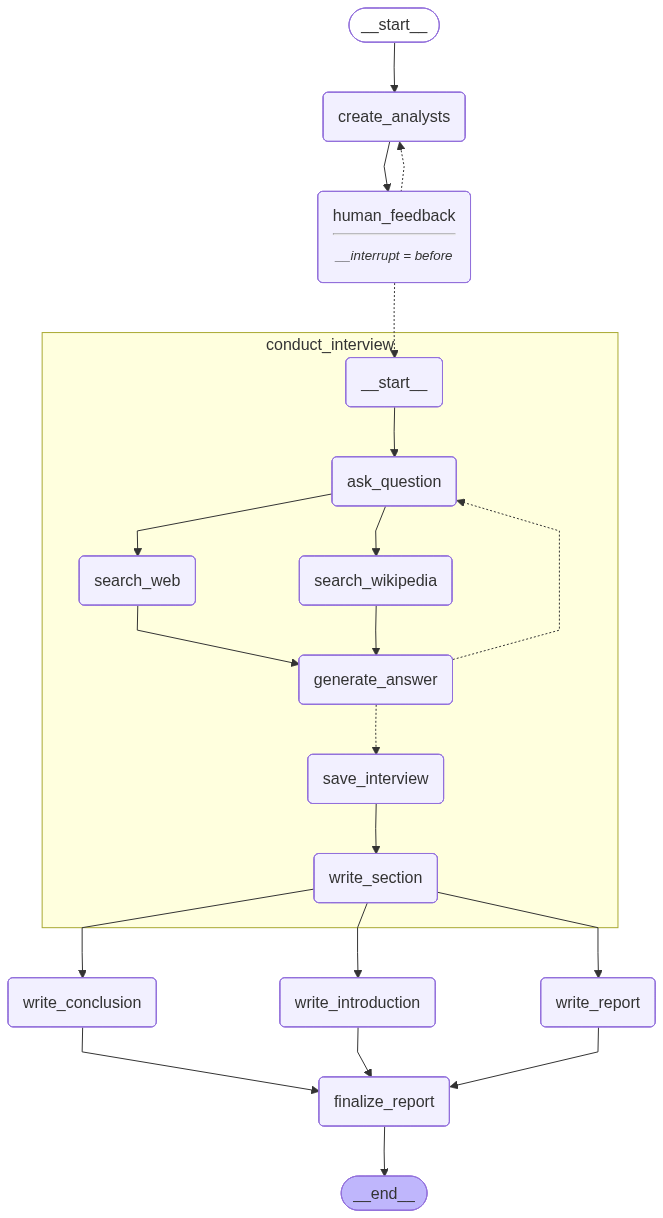

In [106]:
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [107]:
max_analysts = 3

In [108]:
topic ="How can generative AI accelerate drug discovery"

In [109]:
thread = {"configurable": {"thread_id": "1"}}

In [112]:
# Run the graph until the first interrutpion
for event in graph.stream({"topic": topic, "max_analysts":max_analysts}, thread, stream_mode="values"):
    analysts = event.get('analysts', '')
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)

Name: Dr. Rachel Kim
Affiliation: Stanford University
Role: AI Researcher
Description: Focuses on the application of generative AI in drug discovery, particularly in the area of molecular generation and optimization.
--------------------------------------------------
Name: Dr. Liam Chen
Affiliation: Pfizer
Role: Pharmaceutical Industry Expert
Description: Examines the potential of generative AI to accelerate drug discovery from an industry perspective, including its impact on pipeline development and regulatory approval.
--------------------------------------------------
Name: Dr. Maya Patel
Affiliation: Harvard University
Role: Bioethicist
Description: Investigates the ethical implications of using generative AI in drug discovery, including concerns around data privacy, bias, and the responsible use of AI-generated discoveries.
--------------------------------------------------


HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


Name: Dr. Rachel Kim
Affiliation: Stanford University
Role: AI Researcher
Description: Focus on leveraging generative AI for molecular design and simulation in drug discovery
--------------------------------------------------
Name: Dr. Liam Chen
Affiliation: Harvard Medical School
Role: Clinical Trials Specialist
Description: Examines the potential of generative AI in optimizing clinical trial design, patient recruitment, and outcome prediction
--------------------------------------------------
Name: Dr. Maya Patel
Affiliation: McKinsey & Company
Role: Pharmaceutical Industry Consultant
Description: Investigates the future applications of generative AI in streamlining drug development pipelines, from target identification to regulatory approval
--------------------------------------------------


In [111]:
graph.update_state(thread, {"human_analyst_feedback": "add the future uses of genai in clinical trials also along with drug dicovery"}, as_node= "human_feedback")

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0ad91b-f833-6a76-8002-54b388e79d69'}}

In [113]:
graph.update_state(thread, {"human_analyst_feedback": ""}, as_node= "human_feedback")

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0ad92b-6ba2-6116-8006-a1ccf5778fd7'}}

In [114]:
graph.get_state(thread).next

('conduct_interview', 'conduct_interview', 'conduct_interview')

In [127]:
# Continue
for event in graph.stream(None, thread, stream_mode="updates"):
    print("--Node--")
    node_name = next(iter(event.keys()))
    print(node_name)

--Node--
conduct_interview


HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


**************************************************
search_query='generative AI in drug discovery, target identification, lead optimization, regulatory approval process'


HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


**************************************************
search_query='generative AI in drug discovery protein-ligand interactions Variational Autoencoder (VAE)'


HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
Retrying request to /openai/v1/chat/completions in 19.000000 seconds
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 413 Payload Too Large"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
Retrying request to /openai/v1/chat/completions in 47.000000 seconds
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


APIStatusError: Error code: 413 - {'error': {'message': 'Request too large for model `llama-3.1-8b-instant` in organization `org_01jrt30f2nf5sscttrsabn3jgv` service tier `on_demand` on tokens per minute (TPM): Limit 6000, Requested 7960, please reduce your message size and try again. Need more tokens? Upgrade to Dev Tier today at https://console.groq.com/settings/billing', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}